In [ ]:
# Credit Card Fraud Detection Project
#This project analyzes credit card transaction data to detect fraudulent transactions.

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting

# Set plot style to ggplot
plt.style.use('ggplot')

# Display all columns
pd.set_option('display.max_columns', None)

In [ ]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Look at the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Check the size of the dataset
print(f"Dataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns")

# Get information about data types and missing values
print("\nDataset information:")
df.info()

# Get statistical summary
print("\nStatistical summary:")
df.describe()

# Check the target variable distribution (Class: 0 = normal, 1 = fraud)
print("\nTarget variable distribution:")
print(df['Class'].value_counts())
print(f"Percentage of fraudulent transactions: {df['Class'].mean()*100:.4f}%")

Dataset dimensions: 284807 rows and 31 columns

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 no

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# If duplicates exist, remove them
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Number of duplicate rows: 1081
Dataset shape after removing duplicates: (283726, 31)


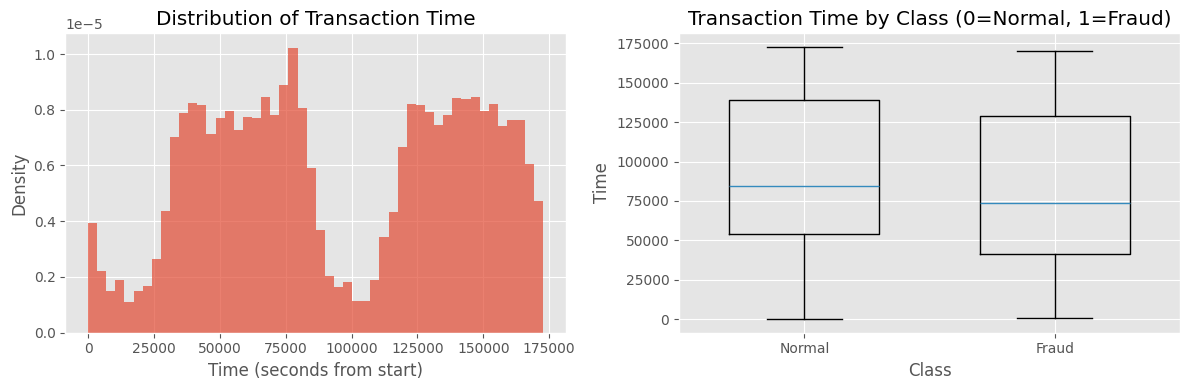

In [ ]:
# Analyze the Time feature
plt.figure(figsize=(12, 4))

# Histogram of transaction time
plt.subplot(121)
plt.hist(df['Time'], bins=50, alpha=0.7, density=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds from start)')
plt.ylabel('Density')

# Boxplot of transaction time by class
plt.subplot(122)
for i, fraud_type in enumerate([0, 1]):
    subset = df[df['Class'] == fraud_type]['Time']
    plt.boxplot(subset, positions=[i], widths=0.6)
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.title('Transaction Time by Class (0=Normal, 1=Fraud)')
plt.xlabel('Class')
plt.ylabel('Time')

plt.tight_layout()
plt.show()

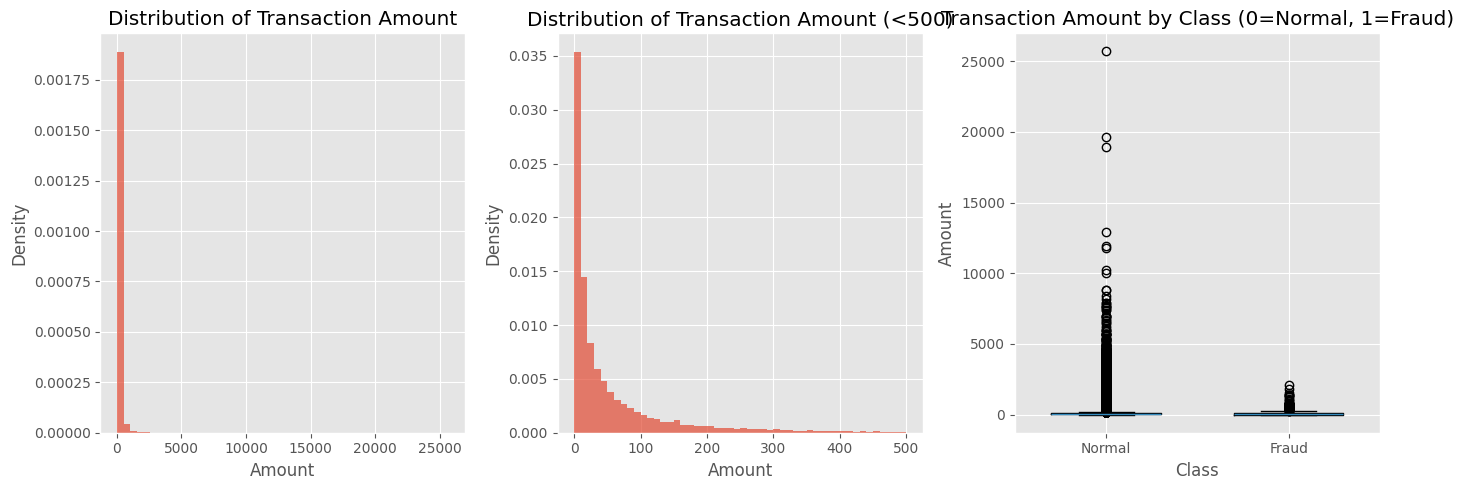

In [ ]:
# Analyze the Amount feature
plt.figure(figsize=(14, 5))

# Histogram of transaction amount
plt.subplot(131)
plt.hist(df['Amount'], bins=50, alpha=0.7, density=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Density')

# Histogram of transaction amount < 500
plt.subplot(132)
plt.hist(df['Amount'][df['Amount'] < 500], bins=50, alpha=0.7, density=True)
plt.title('Distribution of Transaction Amount (<500)')
plt.xlabel('Amount')
plt.ylabel('Density')

# Boxplot of amount by class
plt.subplot(133)
for i, fraud_type in enumerate([0, 1]):
    subset = df[df['Class'] == fraud_type]['Amount']
    plt.boxplot(subset, positions=[i], widths=0.6)
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.title('Transaction Amount by Class (0=Normal, 1=Fraud)')
plt.xlabel('Class')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

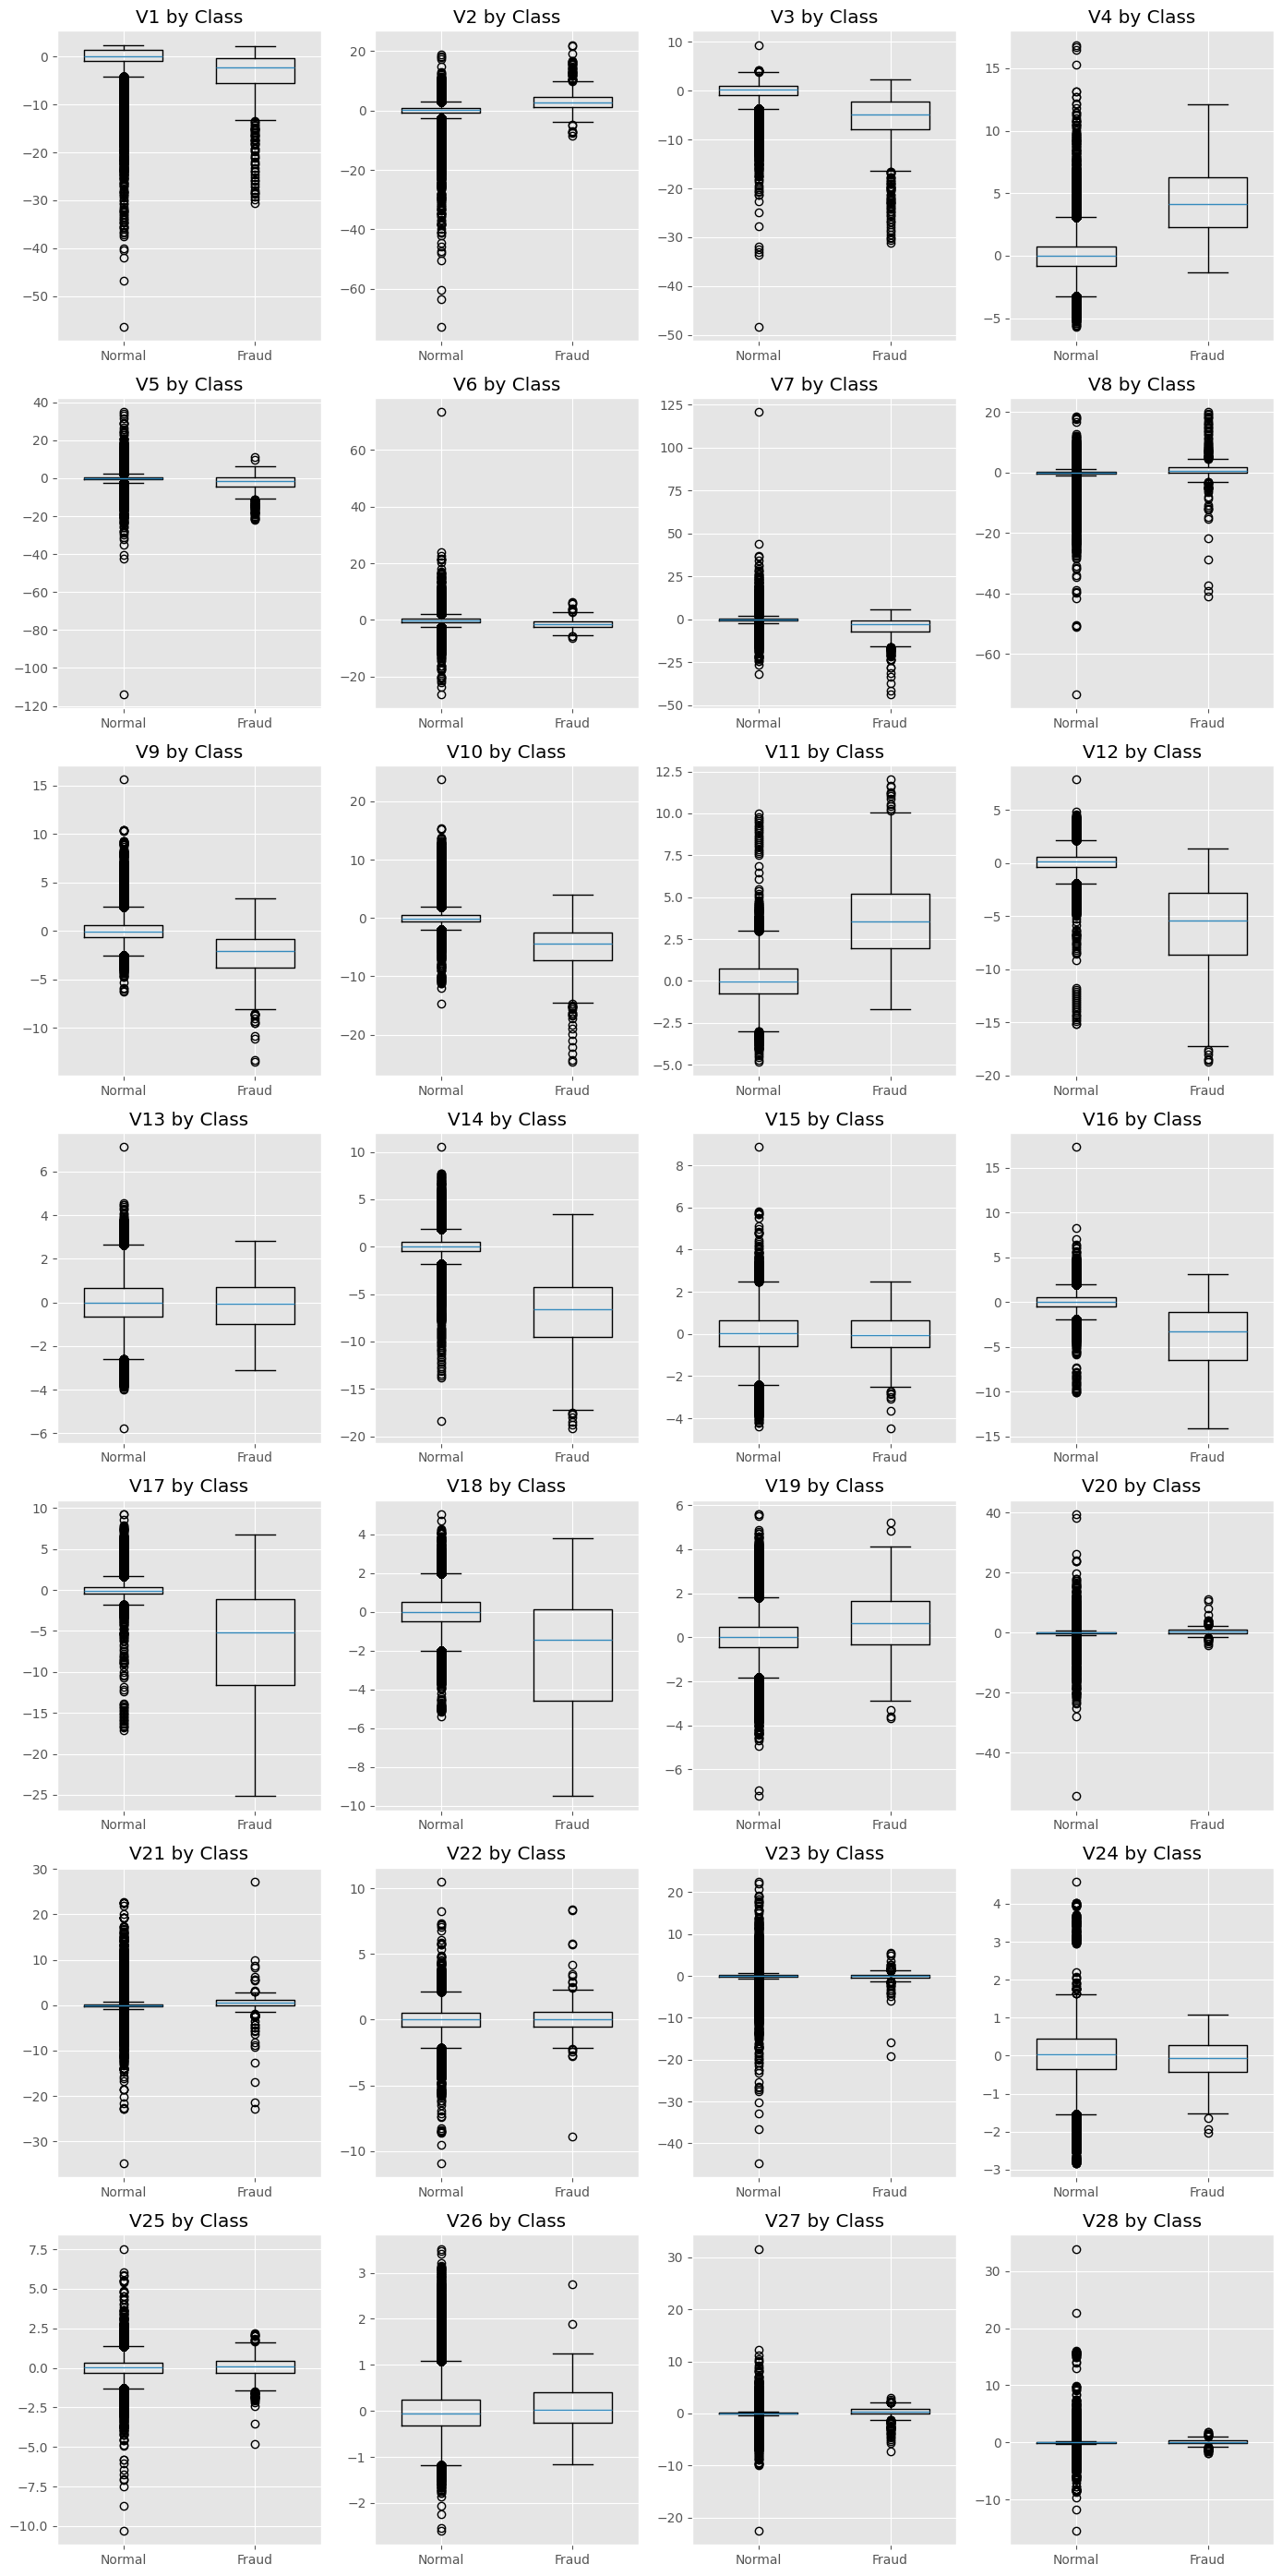

In [ ]:
# Analyze V1-V28 features
plt.figure(figsize=(14, 28))
for i in range(1, 29):
    plt.subplot(7, 4, i)
    feature = f'V{i}'

    # Create boxplot for each class
    for j, fraud_type in enumerate([0, 1]):
        subset = df[df['Class'] == fraud_type][feature]
        plt.boxplot(subset, positions=[j], widths=0.6)

    plt.xticks([0, 1], ['Normal', 'Fraud'])
    plt.title(f'{feature} by Class')

plt.tight_layout()
plt.show()

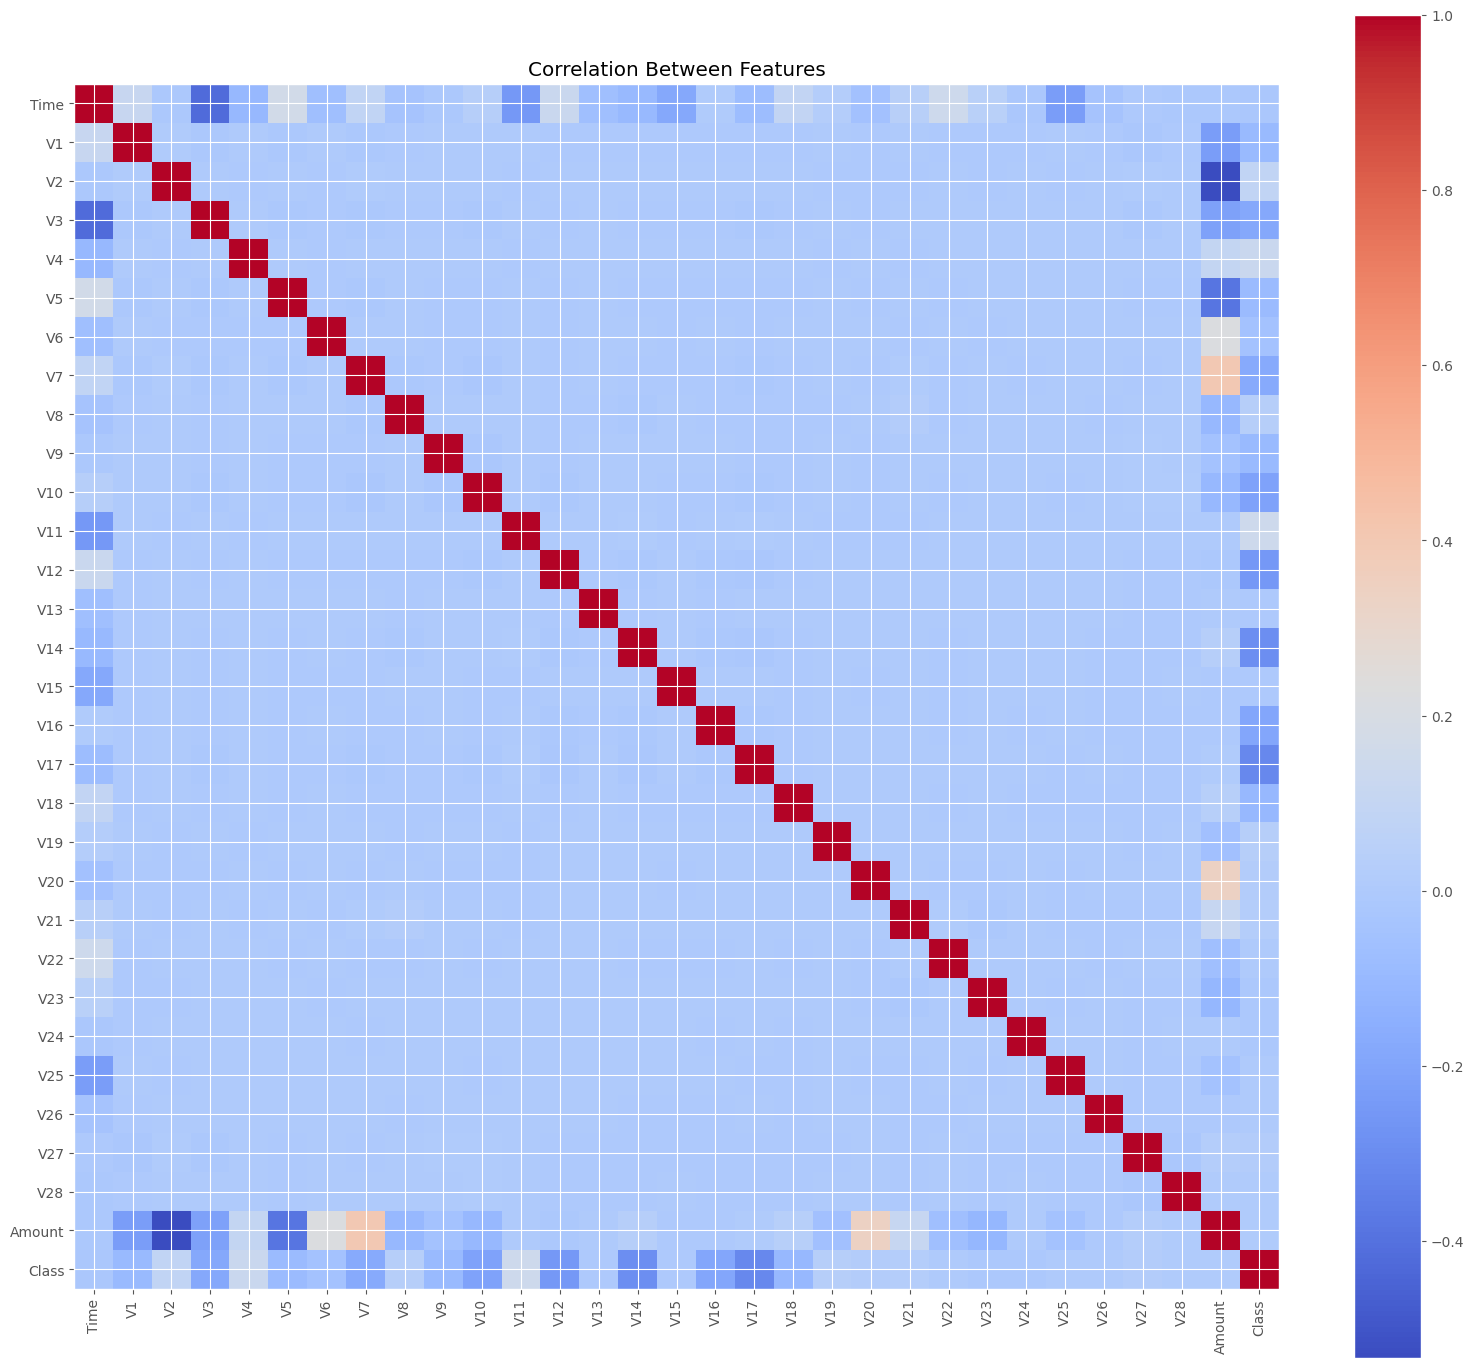

Top 10 features correlated with Class (fraud):
Class    1.000000
V11      0.149067
V4       0.129326
V2       0.084624
V19      0.033631
V8       0.033068
V21      0.026357
V27      0.021892
V20      0.021486
V28      0.009682
Name: Class, dtype: float64


In [ ]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 14))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()

# Show top correlated features with the target
print("Top 10 features correlated with Class (fraud):")
print(corr_matrix['Class'].sort_values(ascending=False)[:10])

In [ ]:
# Separate the majority and minority classes
normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

print(f"Normal transactions: {len(normal)}")
print(f"Fraudulent transactions: {len(fraud)}")

# Option 1: Under-sampling - Take a random sample of normal transactions equal to fraud count
normal_sample = normal.sample(n=len(fraud))
undersampled_df = pd.concat([normal_sample, fraud])

# Option 2: Over-sampling - Use a smaller number for beginning stages of your project
# For full project, consider using SMOTE from imblearn library

# Let's use undersampling for now
balanced_df = undersampled_df.sample(frac=1).reset_index(drop=True)
print(f"Balanced dataset shape: {balanced_df.shape}")
print(balanced_df['Class'].value_counts())

Normal transactions: 283253
Fraudulent transactions: 473
Balanced dataset shape: (946, 31)
Class
1    473
0    473
Name: count, dtype: int64


In [ ]:
# Separate features and target variable
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 662 samples
Testing set: 284 samples


In [ ]:
# Scale the features (important for many ML algorithms)
from sklearn.preprocessing import StandardScaler

# Keep 'Time' and 'Amount' before scaling
time_train = X_train['Time'].values.reshape(-1, 1)
time_test = X_test['Time'].values.reshape(-1, 1)
amount_train = X_train['Amount'].values.reshape(-1, 1)
amount_test = X_test['Amount'].values.reshape(-1, 1)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Logistic Regression Model Performance:
Accuracy: 0.9014


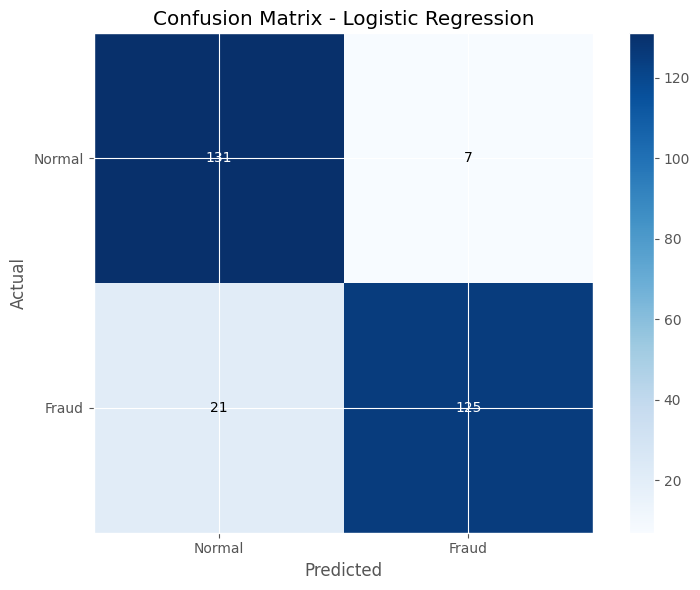


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       138
           1       0.95      0.86      0.90       146

    accuracy                           0.90       284
   macro avg       0.90      0.90      0.90       284
weighted avg       0.91      0.90      0.90       284



In [ ]:
# Build a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.yticks([0, 1], ['Normal', 'Fraud'])

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center',
                 color='white' if cm[i, j] > cm.max()/2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Model Performance:
Accuracy: 0.9120


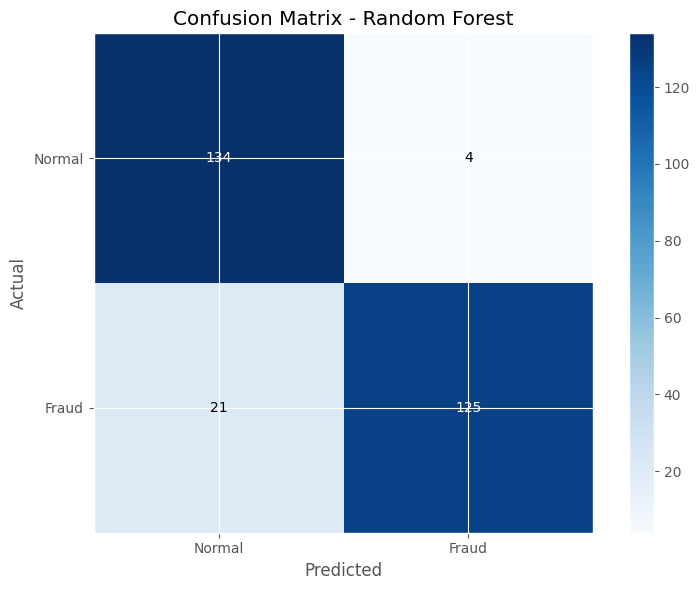


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       138
           1       0.97      0.86      0.91       146

    accuracy                           0.91       284
   macro avg       0.92      0.91      0.91       284
weighted avg       0.92      0.91      0.91       284



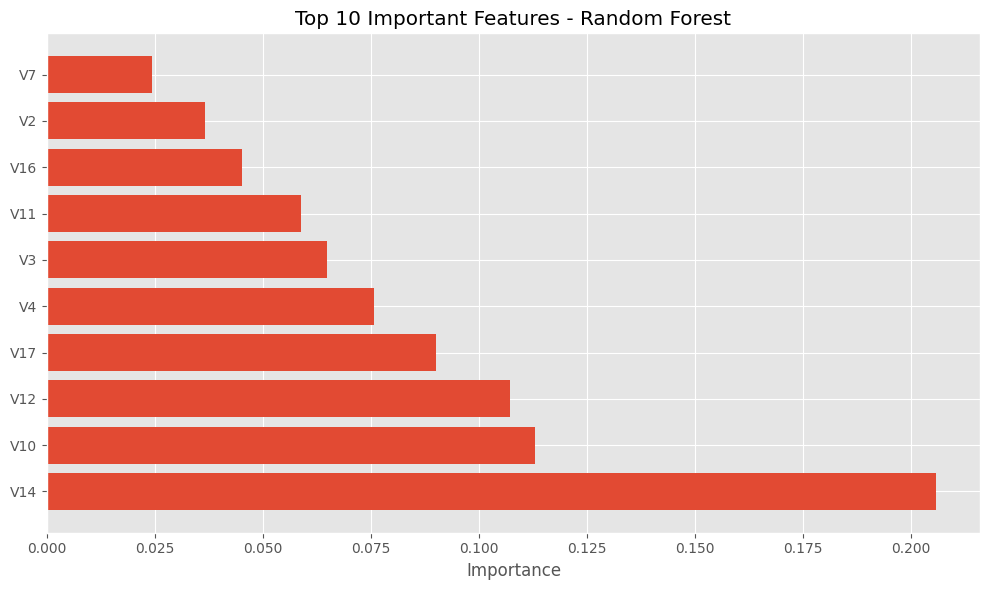

In [ ]:
# Build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Display confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.imshow(cm_rf, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.yticks([0, 1], ['Normal', 'Fraud'])

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm_rf[i, j]), ha='center', va='center',
                 color='white' if cm_rf[i, j] > cm_rf.max()/2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(10)['Feature'], feature_importance.head(10)['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Important Features - Random Forest')
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest Performance on Imbalanced Test Data:
Accuracy: 0.9769


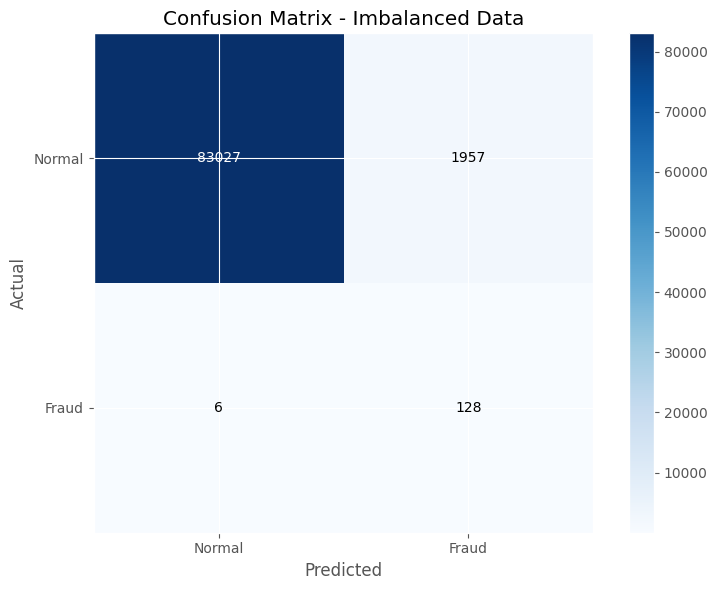


Classification Report on Imbalanced Data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84984
           1       0.06      0.96      0.12       134

    accuracy                           0.98     85118
   macro avg       0.53      0.97      0.55     85118
weighted avg       1.00      0.98      0.99     85118



In [ ]:
# Now let's test our model on a more realistic (imbalanced) dataset
# Split the original imbalanced data
X_orig = df.drop('Class', axis=1)
y_orig = df['Class']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_orig, y_orig, test_size=0.3, random_state=42)

# Scale the features
X_train_orig_scaled = scaler.transform(X_train_orig)
X_test_orig_scaled = scaler.transform(X_test_orig)

# Use our Random Forest model to make predictions
y_pred_imbalanced = rf_model.predict(X_test_orig_scaled)

# Evaluate on imbalanced data
print("Random Forest Performance on Imbalanced Test Data:")
print(f"Accuracy: {accuracy_score(y_test_orig, y_pred_imbalanced):.4f}")

# Confusion matrix for imbalanced data
cm_imb = confusion_matrix(y_test_orig, y_pred_imbalanced)

# Since we have very few frauds, using percentages might be clearer
plt.figure(figsize=(8, 6))
plt.imshow(cm_imb, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Imbalanced Data')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.yticks([0, 1], ['Normal', 'Fraud'])

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm_imb[i, j]), ha='center', va='center',
                 color='white' if cm_imb[i, j] > cm_imb.max()/2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Display classification report
print("\nClassification Report on Imbalanced Data:")
print(classification_report(y_test_orig, y_pred_imbalanced))

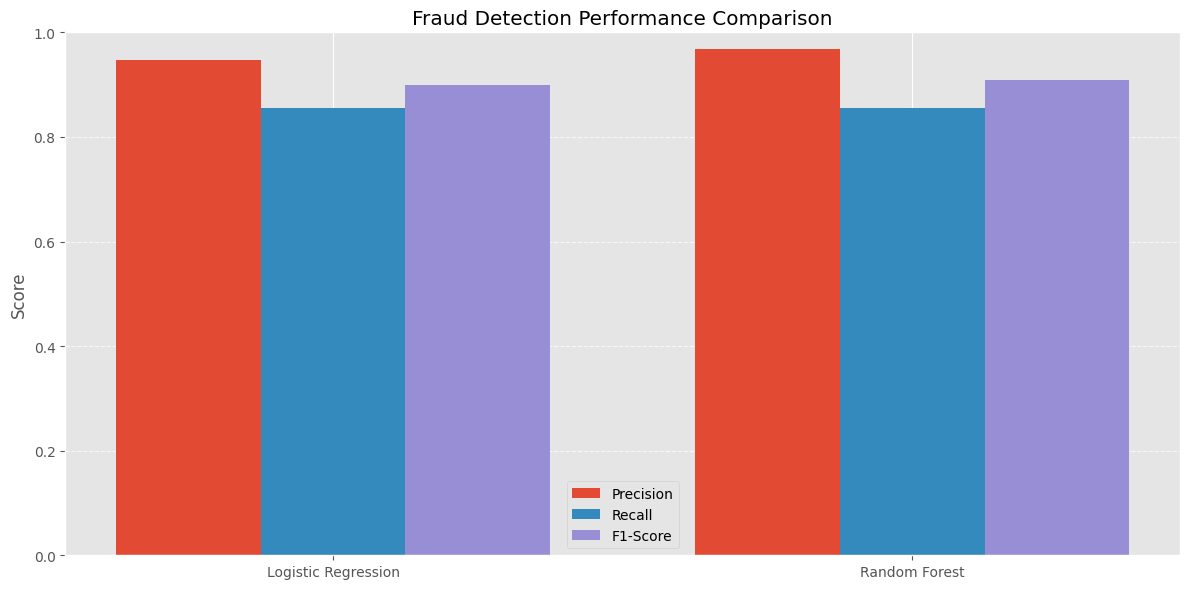

In [ ]:
# Let's create a final visualization to summarize our findings
# Compare the precision and recall for fraud detection between models

models = ['Logistic Regression', 'Random Forest']
precision_scores = []
recall_scores = []
f1_scores = []

# Get classification report as dictionary for each model
from sklearn.metrics import precision_recall_fscore_support

# For balanced test data
lr_metrics = precision_recall_fscore_support(y_test, y_pred, average=None)
rf_metrics = precision_recall_fscore_support(y_test, y_pred_rf, average=None)

# Extract metrics for fraud class (index 1)
precision_scores = [lr_metrics[0][1], rf_metrics[0][1]]
recall_scores = [lr_metrics[1][1], rf_metrics[1][1]]
f1_scores = [lr_metrics[2][1], rf_metrics[2][1]]

# Create a bar plot for model comparison
plt.figure(figsize=(12, 6))
x = np.arange(2)
width = 0.25

plt.bar(x - width, precision_scores, width, label='Precision')
plt.bar(x, recall_scores, width, label='Recall')
plt.bar(x + width, f1_scores, width, label='F1-Score')

plt.title('Fraud Detection Performance Comparison')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()